In [42]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder 
import pickle
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [43]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
def preprocessing_data(df):
    cols_to_drop=['RowNumber','CustomerId','Surname'] if 'RowNumber' in df.columns else [] 
    df = df.drop(columns=cols_to_drop,errors='ignore',axis=1)
    return df
data=preprocessing_data(data)

In [45]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Geography', ylabel='count'>

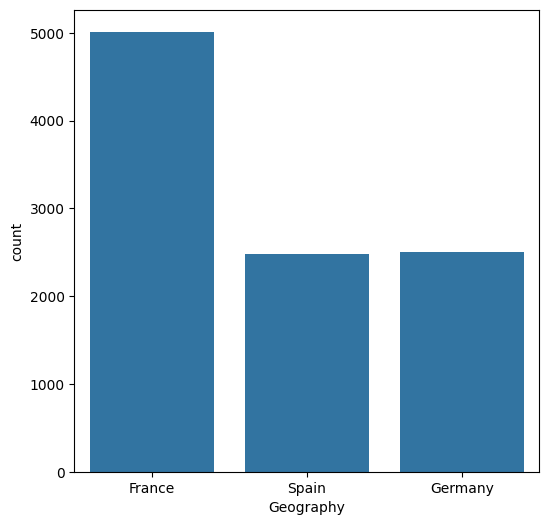

In [46]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.countplot(x=data['Geography'],data=data)

In [47]:
## categorical variables encoding technique
label_enc=LabelEncoder()
data['Gender']=label_enc.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [48]:
from sklearn.preprocessing import OneHotEncoder
one_enc=OneHotEncoder() ## coz we use Label encoder for ordinal(any order following categories) categories not random ones

geo_encoder=one_enc.fit_transform(data[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [49]:
## need to convert the geo_encoder array into sparsed array
geo_enc_df=pd.DataFrame(geo_encoder.toarray(),columns=one_enc.get_feature_names_out(['Geography']))

In [50]:
geo_enc_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [51]:
## combine all the columns
data=pd.concat([data.drop('Geography',axis=1),geo_enc_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [52]:
## save the encoders and scalers for later stages: operations stage

with open('Label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_enc,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(one_enc,file)



In [53]:
#divide dataset into dependent and indepenedent dataset
x=data.drop('Exited',axis=1)
y=data['Exited']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [55]:
# saving scaler file 
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)


ANN implementation

In [56]:
# seq, hidden neural layer(dense) , activation function, optimizer(for back propogation), loss function, metrices(accuracy, rmse mse etc.). training model-> logs->folder->tensorboard->visualizatrion


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime


In [57]:
#build the model

model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)), ## first hidden layer connected with  input payer
    Dense(32,activation='relu',),
    Dense(1,activation='sigmoid') ##output layer
])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
loss=tf.keras.losses.BinaryCrossentropy()


In [65]:
#forward and backward propogation
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

In [66]:
## setup tensorboard to capture the logs
log_dir="log/fit" +datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)


In [71]:
## setup early stopping: to stop training at a certain level if loss value is not imporving to reduce resource wastage
early_stoppin=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [72]:
history=model.fit(
    x_train,y_train,validation_data=(x_test,y_test),epochs=100,callbacks=[tensorflow_callback,early_stoppin]
)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8649 - val_loss: 0.3523 - val_accuracy: 0.8580
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8666 - val_loss: 0.3458 - val_accuracy: 0.8575
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8655 - val_loss: 0.3426 - val_accuracy: 0.8645
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8691 - val_loss: 0.3424 - val_accuracy: 0.8645
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8656 - val_loss: 0.3460 - val_accuracy: 0.8605
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8710 - val_loss: 0.3542 - val_accuracy: 0.8580
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8684 - val_loss: 0.3583 - val_accuracy: 0.8570

In [78]:
model.save('model.h5')##h5 files is comptibel with keras


c:\Users\AKSHAT RAI LADDHA\Data Science Complete\ANN End to End Project\myattempt\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
## load the tensorboard extension
%reload_ext tensorboard

In [81]:
%tensorboard --logdir logs/fit20241004-122146

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

###### getting some issues with tensorboard but code seems to be working in cloud env

In [82]:
# Prediction with trained ANN 
##loading the pickel file

from tensorflow.keras.models import load_model
import pickle
import numpy as np
import pandas as pd

In [83]:
## load the ann trained model, scaler pickle file and encoders 
model=load_model('model.h5')

#load encoders and scalers
with open('Label_encoder_gender.pkl','rb') as file:
    label_enc_gender=pickle.load(file)
with open('onehot_encoder_geo.pkl','rb') as file:
    onehot_encoder_geo=pickle.load(file)
with open('scaler.pkl','rb') as file:
    scaler=pickle.load(file)

###### with these pickle files we can now use them over any new data to get ouput from our trained model.